In [1]:
!pip install qiskit

In [2]:
!pip install pylatexenc

In [3]:
!pip install qiskit-aer

In [4]:
#On installe qiskit, pylatexenc et qiskit-aer

In [5]:
import numpy as np

In [6]:
from qiskit import *

In [7]:
from qiskit import transpile, QuantumCircuit, execute, Aer

In [8]:
from qiskit.visualization import circuit_drawer

In [9]:
import qiskit
import matplotlib

In [10]:
#On importe toute les bibliothèque nécessaire (numpy, transpile, circuit_drawer, matplotlib, ...)

In [11]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circ = QuantumCircuit(q, c)

In [12]:
#On créer des registres quantiques et classiques de 3 entités.
#q(0)= 1er gardien, q(1)=deuxième gardien, q(2)=mensonge

In [13]:
circ.h(0)

In [14]:
circ.cx(0,1)

In [15]:
circ.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
q0_2: ──────────
                
c0: 3/══════════

In [16]:
#On place le trésor de manière aléatoire en ajouter une porte Hadamard sur q(0) et q(2) pour avoir une probabilité de 50%. 
#On place ensuite une porte CNOT pour que q(0)et Q(1) voie la même chose

In [17]:
circ.cx(2,1)

In [18]:
circ.x(2)

In [19]:
circ.draw()

┌───┐               
q0_0: ┤ H ├──■────────────
      └───┘┌─┴─┐┌───┐     
q0_1: ─────┤ X ├┤ X ├─────
           └───┘└─┬─┘┌───┐
q0_2: ────────────■──┤ X ├
                     └───┘
c0: 3/════════════════════

In [20]:
circ.cx(2,0)

In [21]:
circ.x(2)

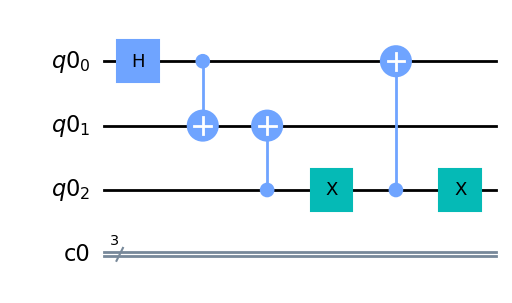

In [22]:
circuit_drawer(circ, output='mpl', style="clifford")

In [23]:
#Cette première partie est pour la question "Le trésor ce trouve derière quelle porte"

In [24]:
circ.swap(0,1)

In [25]:
circ.x(0)

In [26]:
circ.x(1)

In [27]:
circ.cx(2,1)

In [28]:
circ.x(2)

In [29]:
circ.cx(2,0)

In [30]:
circ.x(2)

In [31]:
circ.draw()

┌───┐               ┌───┐     ┌───┐          ┌───┐     
q0_0: ┤ H ├──■────────────┤ X ├──X──┤ X ├──────────┤ X ├─────
      └───┘┌─┴─┐┌───┐     └─┬─┘  │  ├───┤┌───┐     └─┬─┘     
q0_1: ─────┤ X ├┤ X ├───────┼────X──┤ X ├┤ X ├───────┼───────
           └───┘└─┬─┘┌───┐  │  ┌───┐└───┘└─┬─┘┌───┐  │  ┌───┐
q0_2: ────────────■──┤ X ├──■──┤ X ├───────■──┤ X ├──■──┤ X ├
                     └───┘     └───┘          └───┘     └───┘
c0: 3/═══════════════════════════════════════════════════════

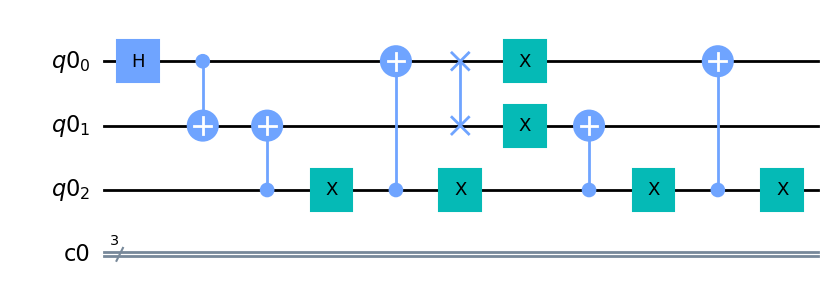

In [32]:
circuit_drawer(circ, output='mpl', style="clifford")

In [33]:
#Cette deuxième partie est pour la question "Quelle porte l'autre gardien me dirait de ne pas prendre"

In [34]:
# On mesure les qubits et on stocks les résultats dans les cbits

In [35]:
circ.measure(q, c)

In [40]:
#On exécute le circuit sur un simulateur sur 1000 essaies

In [41]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1000)
result = job.result()

In [42]:
# On obtien les résultats de la mesure

In [43]:
counts = result.get_counts(circ)
print(counts)

{'000': 479, '011': 521}


In [ ]:
#Le résultat montre que le trésor est derrière la porte 1, car les deux gardiens sont d'accord et le mensonge a été détecté.